# Section 2.3 — Inventory of discrete distributions

This notebook contains all the code examples from [Section 2.3 Inventory of discrete distributions](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=65) of the **No Bullshit Guide to Statistics**.


![Examples of discrete distributions](./attachments/prob_models_discrete_examples_panel.png) 

#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (6,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
%pip install -q ministats

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ministats import plot_pmf
from ministats import plot_cdf

## Definitions

## Math prerequisites

### Combinatorics

See SciPy docs:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.perm.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html




#### Factorial

In [6]:
from scipy.special import factorial
# ALT.
# from math import factorial

In [7]:
factorial(4)

24.0

In [8]:
factorial(1), factorial(2), factorial(3)

(1.0, 2.0, 6.0)

In [9]:
[factorial(k) for k in [5,6,7,8,9,10,11,12]]

[120.0, 720.0, 5040.0, 40320.0, 362880.0, 3628800.0, 39916800.0, 479001600.0]

In [10]:
factorial(15)

1307674368000.0

In [11]:
import numpy as np
np.log(factorial(15))/np.log(10)

12.116499611123398

#### Permutations

In [12]:
from scipy.special import perm

perm(5,2)

20.0

In [13]:
perm(5,1), perm(5,2), perm(5,3), perm(5,4), perm(5,5)

(5.0, 20.0, 60.0, 120.0, 120.0)

#### Combinations

In [14]:
from scipy.special import comb

comb(5,2)

10.0

## Discrete distributions reference

### Discrete uniform

In [15]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at
beta = 4   # stop at

# create the rv object
rvU = randint(alpha, beta+1)

# use one of the rv object's methods

The limits of the sample space of the random variable `rvU`
can be obtained by calling its `.support()` method.

In [16]:
rvU.support()

(1, 4)

In [17]:
rvU.mean()

2.5

In [18]:
rvU.var()

1.25

In [19]:
rvU.std()  # = np.sqrt(rvU.var())

1.118033988749895

#### Probability mass function

In [20]:
for x in range(1,4+1):
    print(f"f_U({x})  = ", rvU.pmf(x))

f_U(1)  =  0.25
f_U(2)  =  0.25
f_U(3)  =  0.25
f_U(4)  =  0.25


To create a stem-plot of the probability mass function $f_U$,
we can use the following three-step procedure:

1. Create a range of inputs `xs` for the plot.
2. Compute the value of $f_U =$ `rvU` for each of the inputs and store the results as list of values `fUs`.
3. Plot the values `fUs` by calling the function `plt.stem(xs,fUs)`.


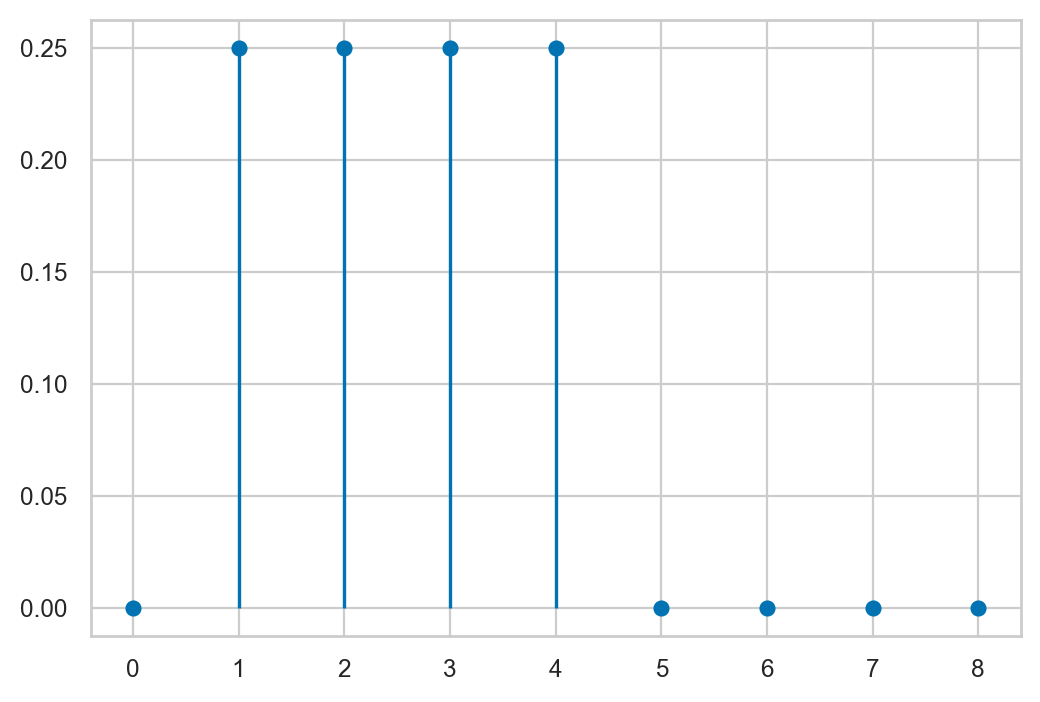

In [21]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(0,8+1)
fUs = rvU.pmf(xs)
plt.stem(xs, fUs, basefmt=" ");

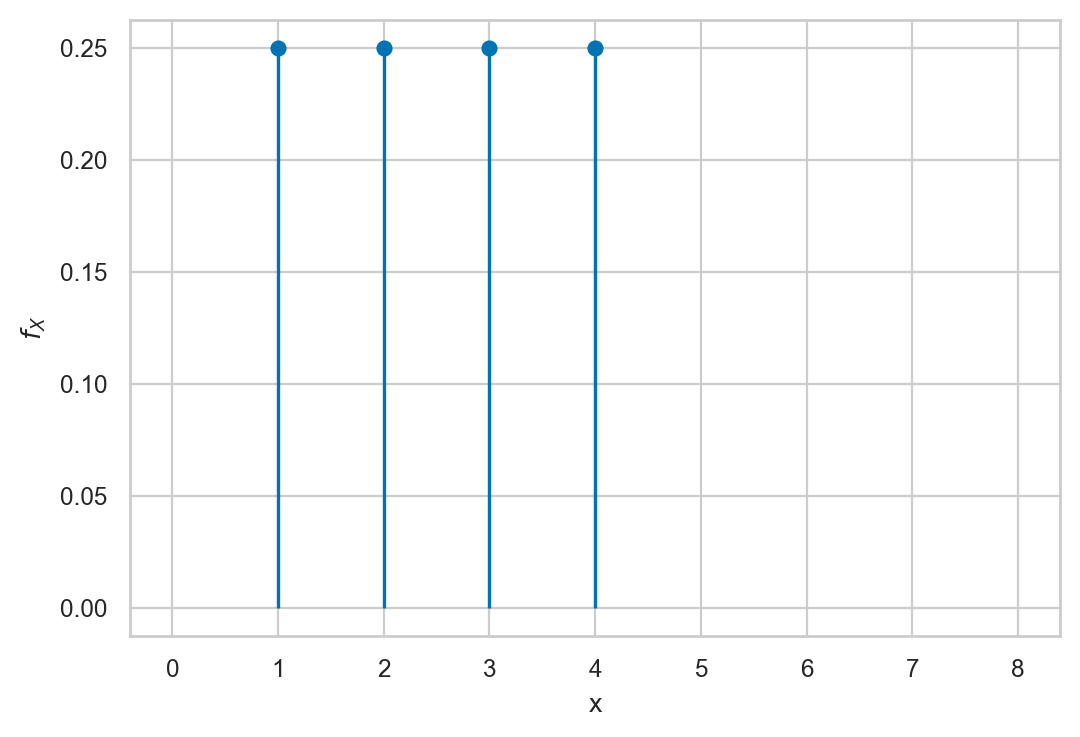

In [22]:
# ALT
plot_pmf(rvU, xlims=[0,8+1]);

#### Cumulative distribution function

In [23]:
for b in range(1,4+1):
    print(f"F_U({b}) =", rvU.cdf(b))

F_U(1) = 0.25
F_U(2) = 0.5
F_U(3) = 0.75
F_U(4) = 1.0


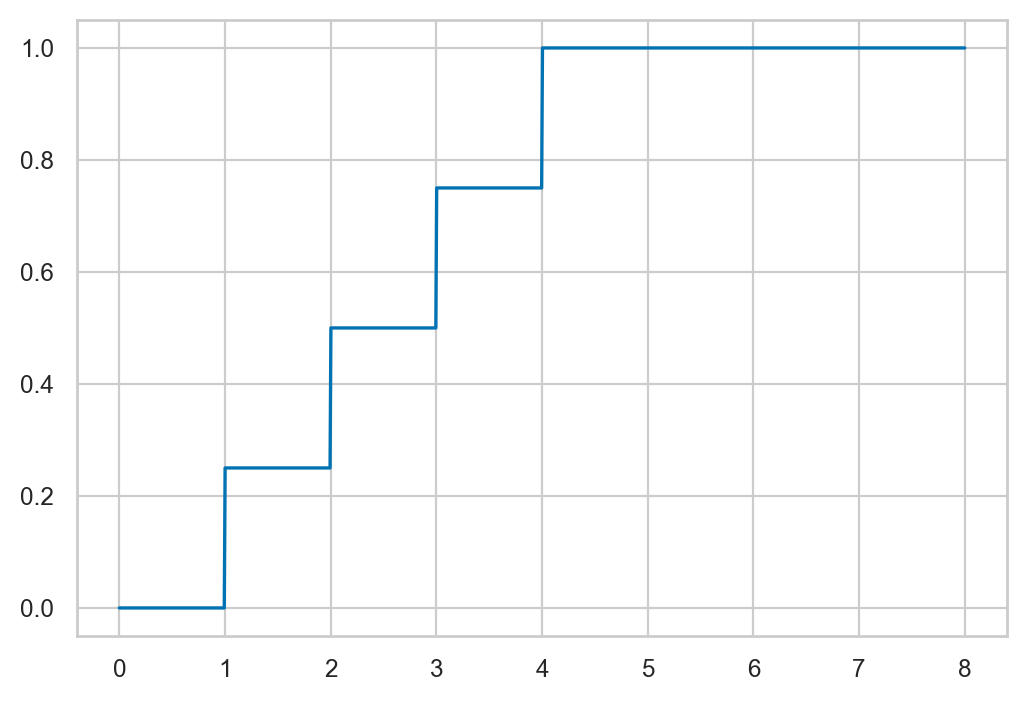

In [24]:
import numpy as np
import seaborn as sns

xs = np.linspace(0,8,1000)
FUs = rvU.cdf(xs)
sns.lineplot(x=xs, y=FUs);

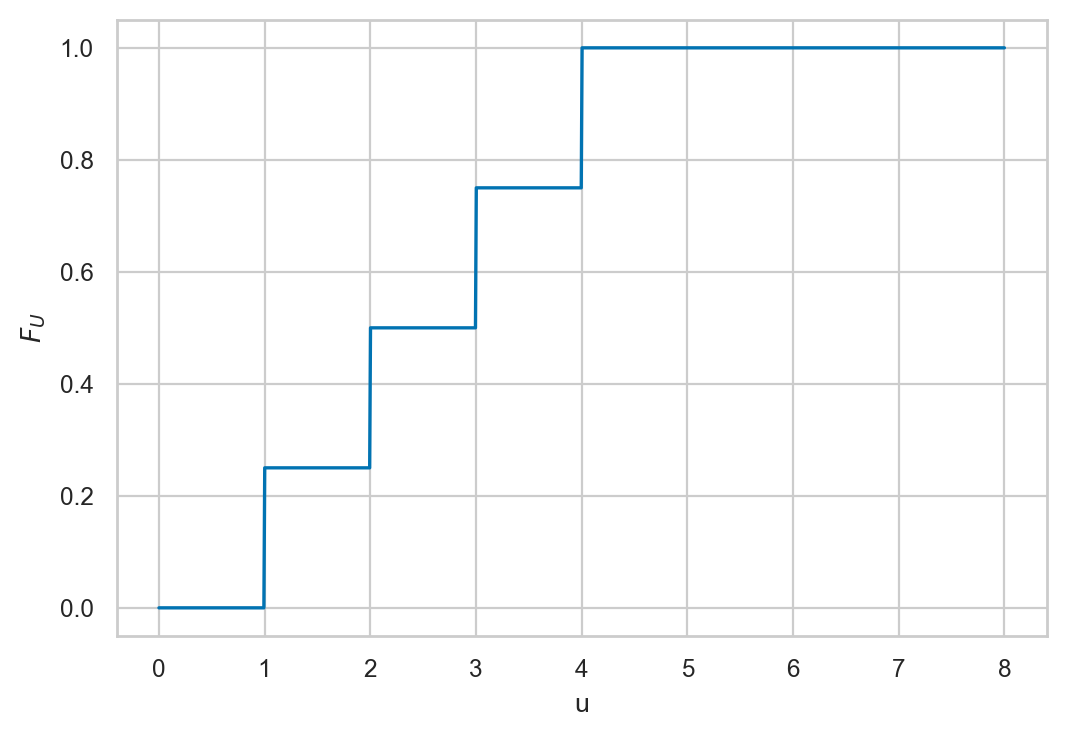

In [25]:
# ALT
plot_cdf(rvU, xlims=[0,8], rv_name="U");

Let's generate 10 random observations from random variable `rvU`:

In [26]:
rvU.rvs(10)

array([3, 4, 1, 3, 3, 4, 1, 1, 3, 2])

### Bernoulli

In [27]:
from scipy.stats import bernoulli

rvB = bernoulli(p=0.3)

In [28]:
rvB.support()

(0, 1)

In [29]:
rvB.mean(), rvB.var()

(0.3, 0.21)

In [30]:
rvB.rvs(10)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

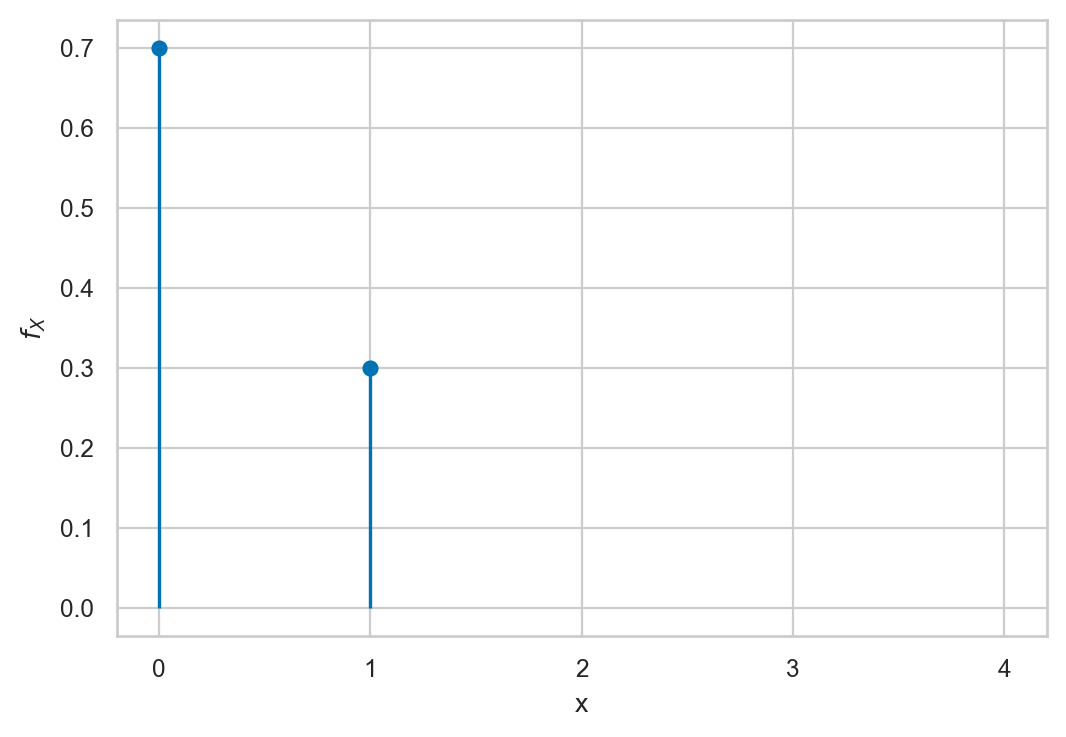

In [31]:
plot_pmf(rvB, xlims=[0,5]);

### Binomial

We'll use the name `rvX` because `rvB` was already used for the Bernoulli random variable above.

In [32]:
from scipy.stats import binom

n = 20
p = 0.14
rvX = binom(n,p)


In [33]:
rvX.support()

(0, 20)

In [34]:
rvX.mean(), rvX.var()

(2.8000000000000003, 2.4080000000000004)

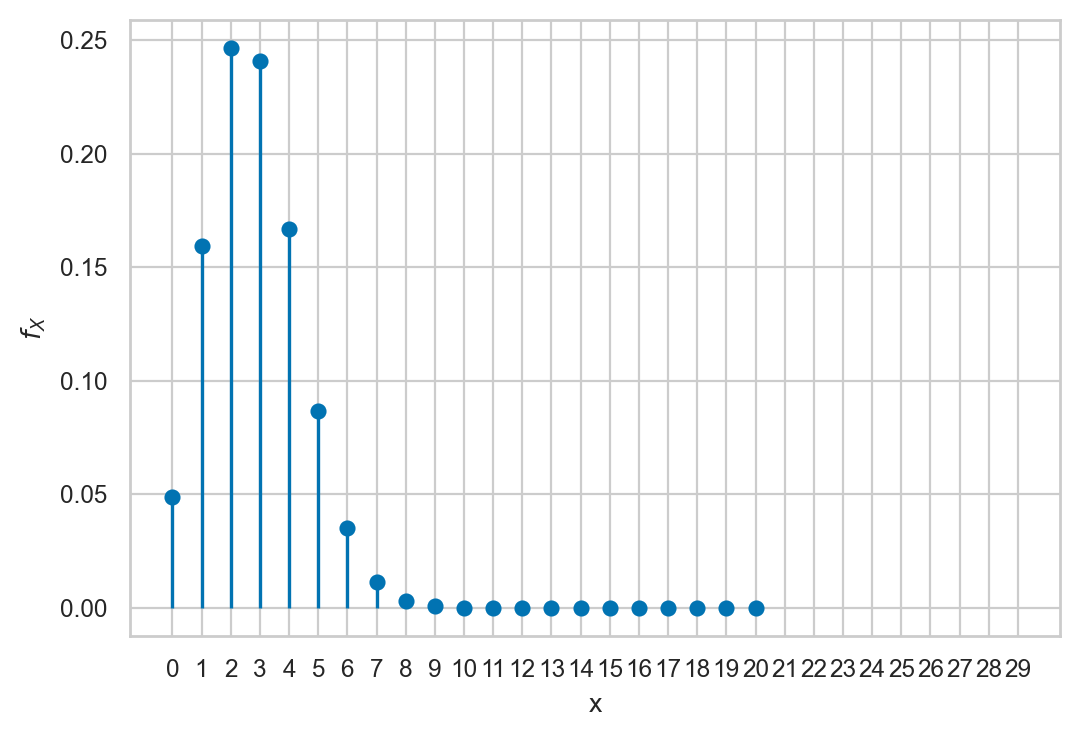

In [35]:
plot_pmf(rvX, xlims=[0,30]);

### Poisson


In [36]:
from scipy.stats import poisson
lam = 10
rvP = poisson(lam)

In [37]:
rvP.pmf(8)

0.11259903214902009

In [38]:
rvP.cdf(8)

0.3328196787507191

In [39]:
## ALT. way to compute the value F_P(8) =
# sum([rvP.pmf(x) for x in range(0,8+1)])

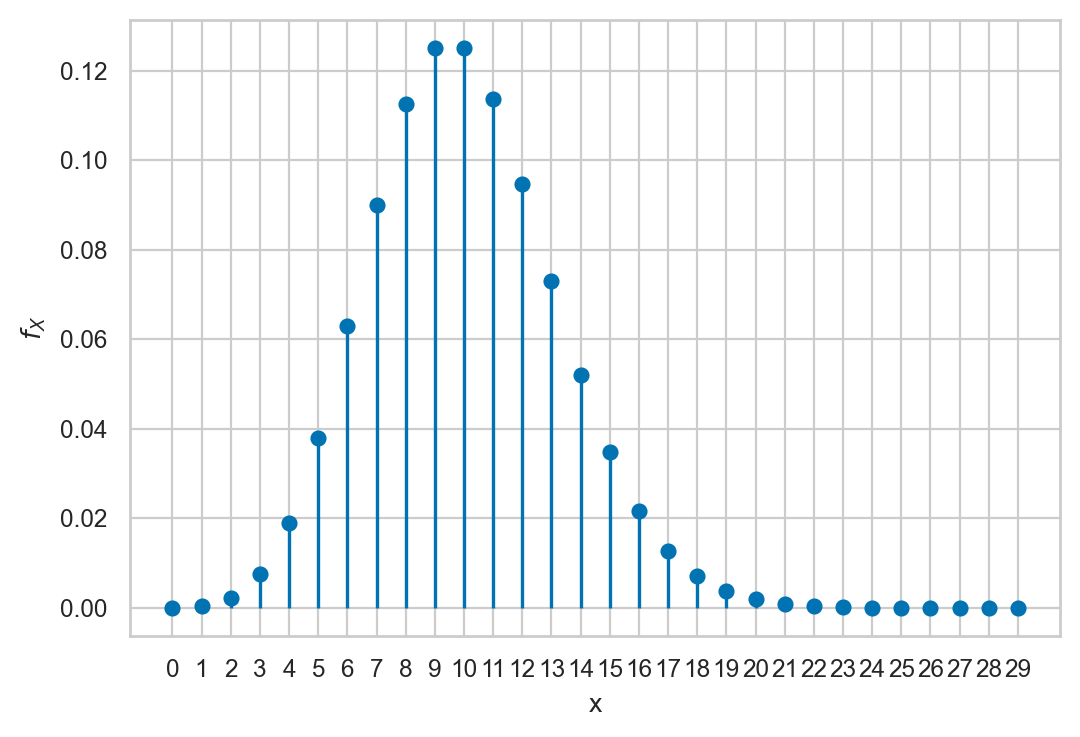

In [40]:
plot_pmf(rvP, xlims=[0,30]);

### Geometric

In [41]:
from scipy.stats import geom

rvG = geom(p = 0.2)

In [42]:
rvG.support()

(1, inf)

In [43]:
rvG.mean(), rvG.var()

(5.0, 20.0)

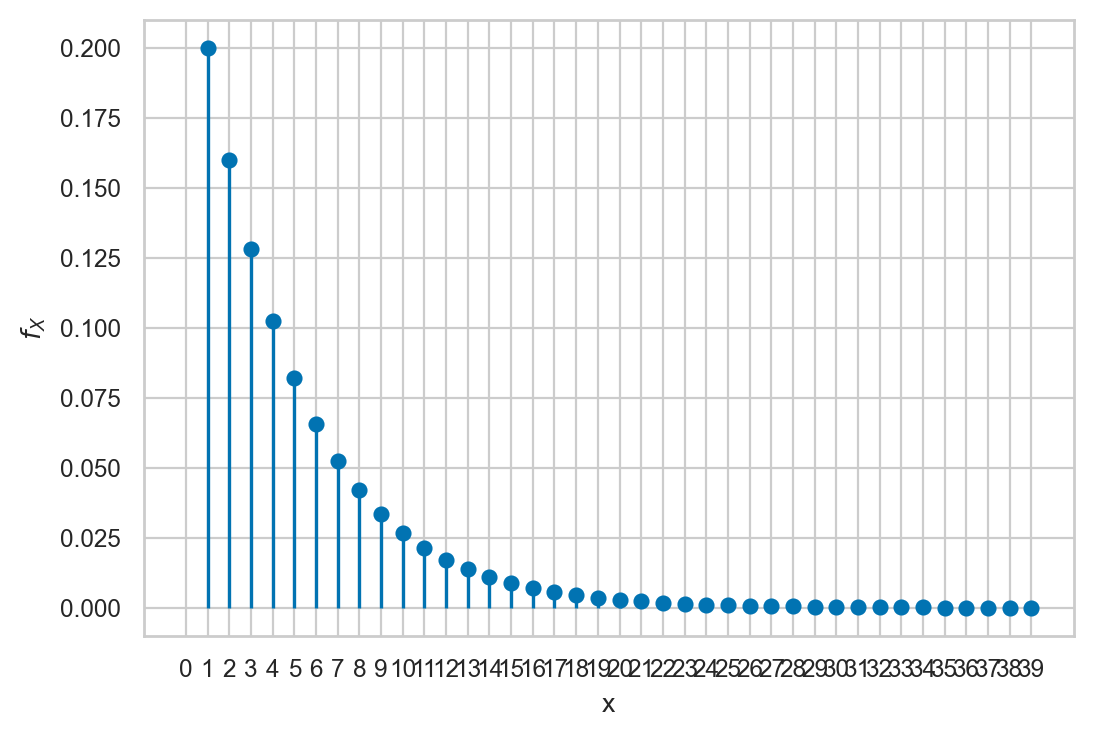

In [44]:
plot_pmf(rvG, xlims=[0,40]);

### Negative binomial

In [45]:
from scipy.stats import nbinom

r = 10
p = 0.5
rvN = nbinom(r,p)

In [46]:
rvN.support()

(0, inf)

In [47]:
rvN.mean(), rvN.var()

(10.0, 20.0)

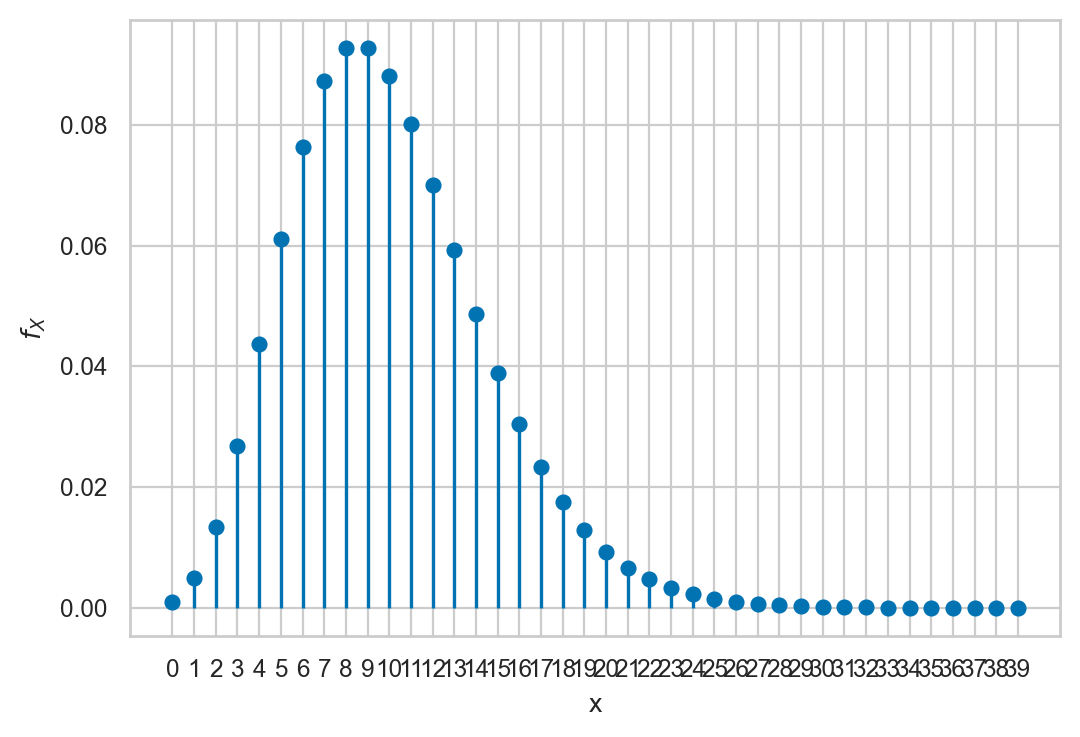

In [48]:
plot_pmf(rvN, xlims=[0,40]);

### Hypergeometric (optional)

<!--
- arg1 = `internal M` = the total number of objects   == a+b
- arg2 = `internal n` = number of success objects     == a 
- arg3 = `internal N` = number of draws               == n
-->

In [49]:
from scipy.stats import hypergeom

a = 30   # number of success balls
b = 40   # number of failure balls
n = 20   # how many we're drawing

rvH = hypergeom(a+b, a, n)

In [50]:
rvH.support()

(0, 20)

In [51]:
rvH.mean(), rvH.var()

(8.571428571428571, 3.54924578527063)

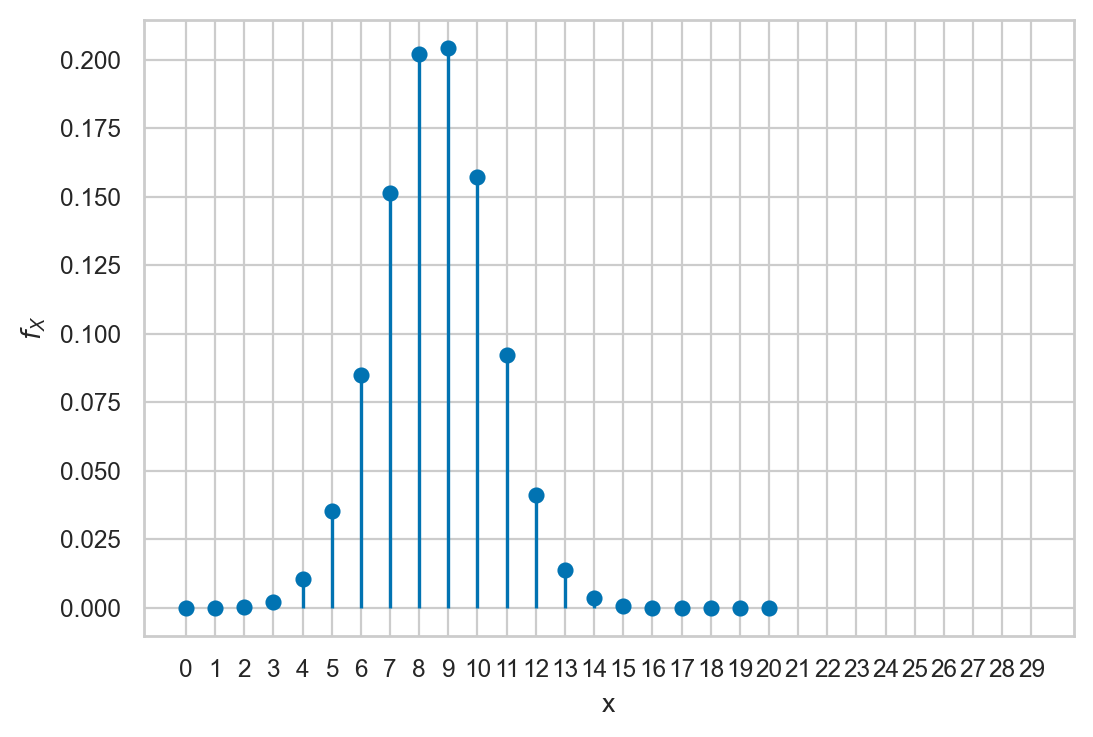

In [52]:
plot_pmf(rvH, xlims=[0,30]);

##### Tomatoes salad probabilities

(0.28571428571428575, 0.5714285714285715, 0.14285714285714288)

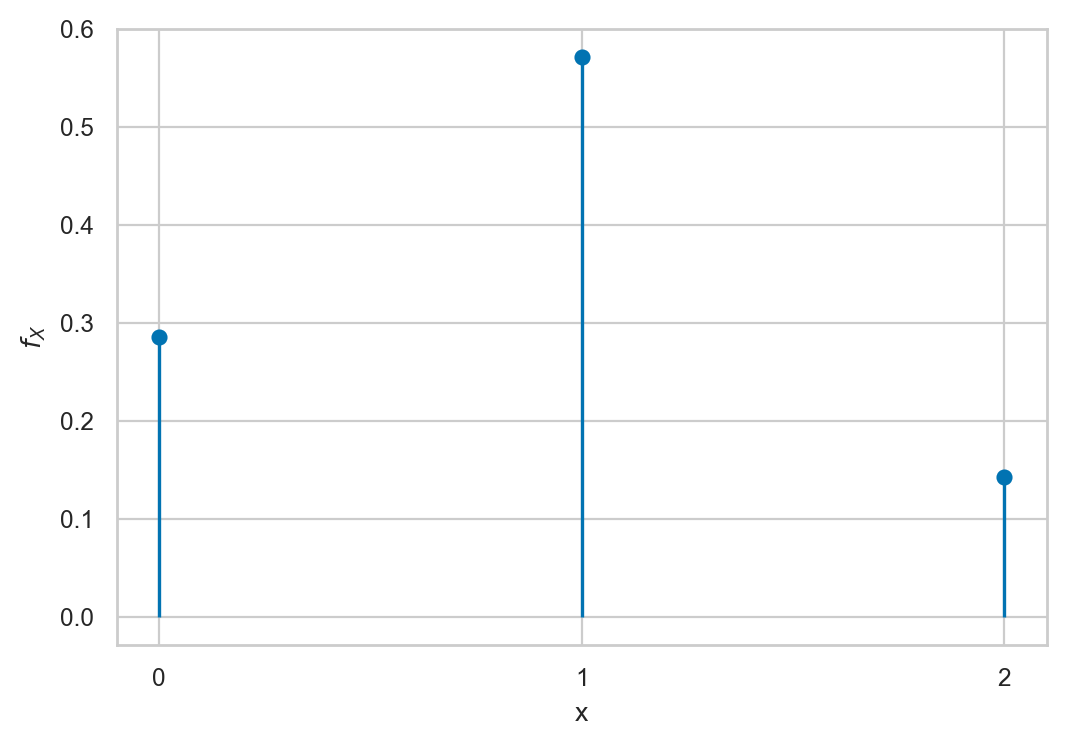

In [53]:
a = 3   # number of good tomatoes
b = 4   # number of rotten tomatoes
n = 2   # how many we're drawing

rvHe = hypergeom(a+b, a, n)


plot_pmf(rvHe, xlims=[0,3])

rvHe.pmf(0), rvHe.pmf(1), rvHe.pmf(2)

##### Number of dogs seen by Amy

In [54]:
a = 7        # number dogs
b = 20 - 7   # number of other animals
n = 12       # how many "patients" Amy will see today

rvD = hypergeom(a+b, a, n)

In [55]:
# Pr of exactly five dogs
rvD.pmf(5)

0.2860681114551084

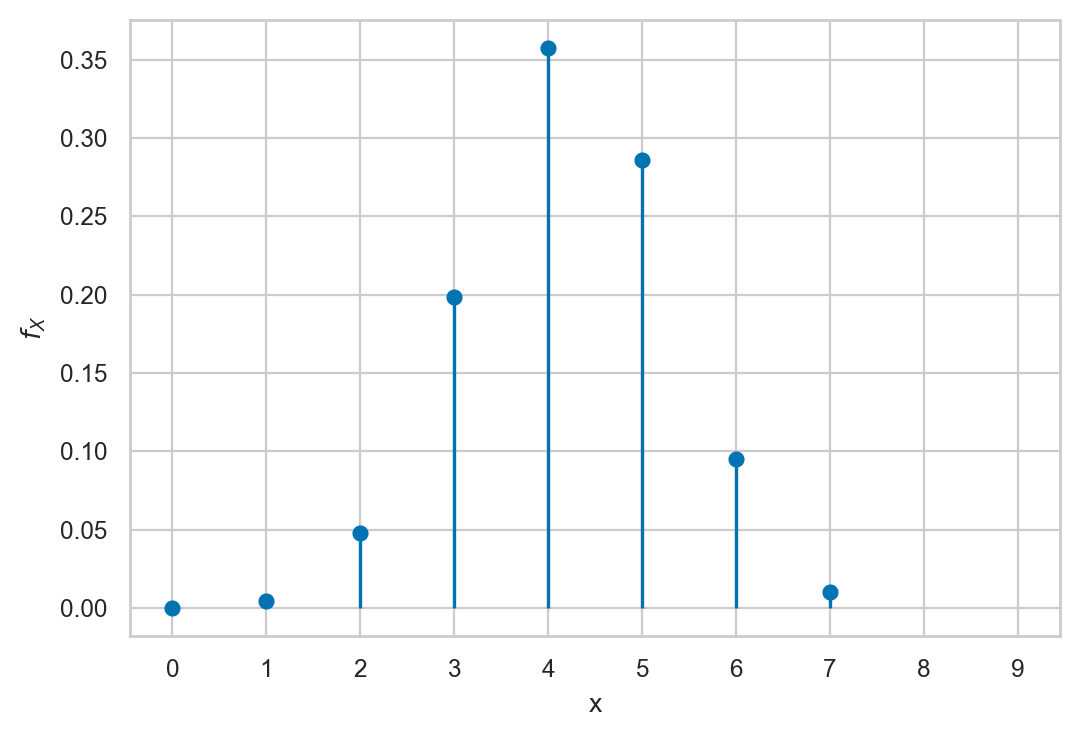

In [56]:
plot_pmf(rvD, xlims=[0,10]);

## Modelling real-world data using probability

TODO: add simple inference and plots

## Review of computer models

## Discussion